In [9]:
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf 
from  tensorflow.keras import layers,losses 
from tensorflow.keras.models import Model
from keras.datasets import mnist 

In [10]:
(x_train,_),(x_test,_)=mnist.load_data()
x_train=x_train.astype('float32')/255.
x_test=x_test.astype('float32')/255.
x_train=np.reshape(x_train,(len(x_train),28,28,1))
x_test=np.reshape(x_test,(len(x_test),28,28,1))

define a basic autoencoder 

In [12]:
class SimpleAutoencoder(Model):
    def __init__(self,latent_dim):
        super(SimpleAutoencoder,self).__init__()
        self.encoder=tf.keras.Sequential([
            layers.Input(shape=(28,28,1)),
            layers.Flatten(),
            layers.Dense(64,activation='relu'),
            layers.Dense(32,activation='relu'),
        ])
        self.decoder=tf.keras.Sequential([
            layers.Dense(28*28,activation='relu'),
            layers.Reshape((28,28,1))
        ])
    def call(self,x):
        encoded=self.encoder(x)
        decoded=self.decoder(encoded)
        return decoded
  

train the data 

In [13]:
latent_dim=64
autoencoder=SimpleAutoencoder(latent_dim)
autoencoder.compile(optimizer='adam',loss=losses.MeanSquaredError())
autoencoder.fit(x_train,x_train,epochs=10,batch_size=256,shuffle=True,validation_data=(x_test,x_test))

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0425 - val_loss: 0.0241
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0212 - val_loss: 0.0187
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0180 - val_loss: 0.0169
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0167 - val_loss: 0.0159
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0160 - val_loss: 0.0155
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0156 - val_loss: 0.0151
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0152 - val_loss: 0.0149
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0150 - val_loss: 0.0147
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0148 - val_loss: 0.0144
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0146 - val_loss: 0.0143


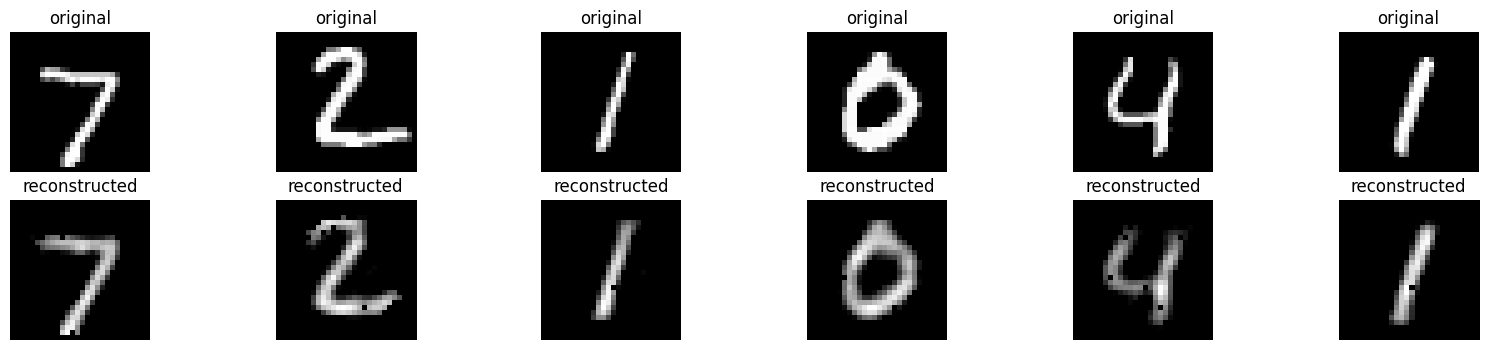

In [14]:
encoded_imgs=autoencoder.encoder(x_test).numpy()
decoded_imgs=autoencoder.decoder(encoded_imgs).numpy()
n=6 
plt.figure(figsize=(20,4))
for i in range(n):
    ax=plt.subplot(2,n,i+1)
    plt.imshow(x_test[i].reshape(28,28),cmap='gray')
    plt.title("original")
    plt.axis('off')
    ax=plt.subplot(2,n,i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28,28),cmap='gray')
    plt.title("reconstructed")
    plt.axis('off')
plt.show()